In [28]:
# Função para extrair o tamanho da instância do nome
def extrair_tamanho(instancia):
    match = re.search(r'\d+', instancia)
    return int(match.group()) if match else None

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Ler o arquivo txt e converter em DataFrame
df = pd.read_csv('results_tsp.txt')

# Aplicar a função para extrair o tamanho da instância e criar uma nova coluna 'Tamanho'
df['Tamanho'] = df['Instancia'].apply(extrair_tamanho)
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

df = df[df['Resultado'] != 'timeout']

# agrupar por instância
# Converter a coluna 'Resultado' para numérico, ignorando os 'null'
df['Resultado'] = pd.to_numeric(df['Resultado'], errors='coerce')

# Criar DataFrames separados para cada algoritmo
df_tatt = df[df['Algoritmo'] == 'tatt']
df_ctfds = df[df['Algoritmo'] == 'ctfds']

# Calcular as diferenças percentuais para cada instância
df_final = df_tatt[['Instancia', 'Tamanho', 'Resultado']].merge(
    df_ctfds[['Instancia', 'Resultado']], on='Instancia', suffixes=('_tatt', '_ctfds')
)

df_final['Diferenca'] = (df_final['Resultado_ctfds']) / df_final['Resultado_tatt'] * 100

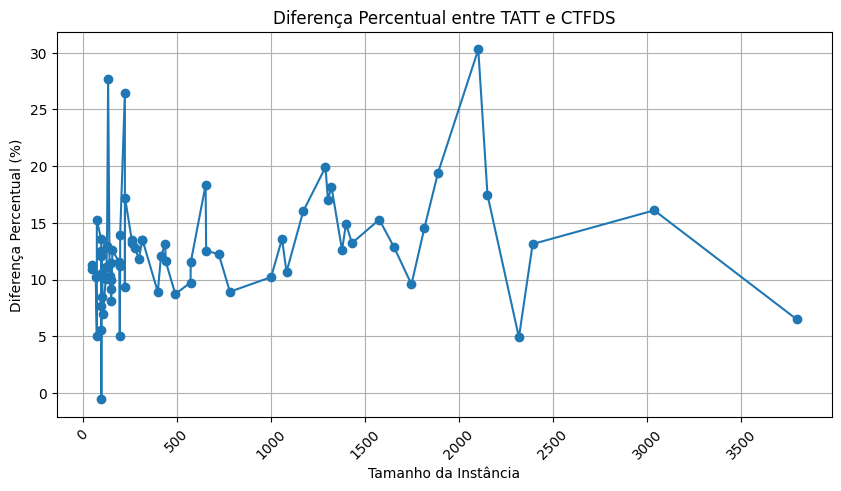

In [30]:
# Plotar o gráfico de diferença percentual
plt.figure(figsize=(10, 5))
plt.plot(df_final['Tamanho'], 100 - df_final['Diferenca'], marker='o')
plt.xticks(rotation=45)
plt.xlabel('Tamanho da Instância')
plt.ylabel('Diferença Percentual (%)')
plt.title('Diferença Percentual entre TATT e CTFDS')
plt.grid(True)
plt.show()

# Comparação de tempo de execução e memória entre os algoritmos

In [31]:
# strip em todas as colunas
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# remover onde resultado é "Timeout"
df = df[df['Resultado'] != 'Timeout']

# remover onde qualidade é 'N/A'
df = df[df['Qualidade'] != 'N/A']

# remover '%' da coluna 'Qualidade' 
df['Qualidade'] = df['Qualidade'].apply(lambda x: float(str(x).replace('%', '')))

# Filtrar os dados para cada algoritmo
df_tatt = df[df['Algoritmo'] == 'tatt']
df_ctfds = df[df['Algoritmo'] == 'ctfds']


In [32]:
df_tatt

,Instancia,Algoritmo,Resultado,Tempo,Memoria,Qualidade,Tamanho
0,eil51.tsp,tatt,584.0,0.001997,56.890625,72.945205,51
2,berlin52.tsp,tatt,10114.0,0.002000,56.917969,74.569903,52
4,st70.tsp,tatt,888.0,0.004513,57.417969,76.013514,70
6,eil76.tsp,tatt,696.0,0.005520,57.515625,77.298851,76
8,pr76.tsp,tatt,145336.0,0.004662,57.441406,74.419965,76
...,...,...,...,...,...,...,...
138,fl3795.tsp,tatt,36256.0,27.168527,2897.554688,79.357899,3795
140,fnl4461.tsp,tatt,255829.0,33.489264,3892.824219,71.362512,4461
142,rl5915.tsp,tatt,842903.0,77.759686,7364.902344,67.093129,5915
143,rl5934.tsp,tatt,817449.0,69.769369,7414.371094,68.021981,5934


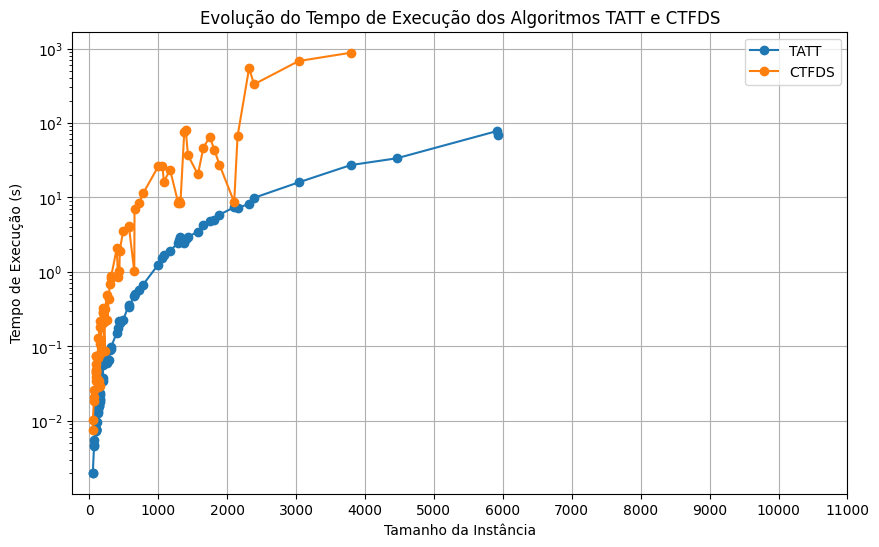

In [33]:
plt.figure(figsize=(10, 6))

# Plotar linha para TATT
plt.semilogy(df_tatt['Tamanho'], df_tatt['Tempo'], label='TATT', marker='o')

# Plotar linha para CTFDS
plt.semilogy(df_ctfds['Tamanho'], df_ctfds['Tempo'], label='CTFDS', marker='o')


# Configurar o gráfico
plt.xlabel('Tamanho da Instância')
plt.ylabel('Tempo de Execução (s)')
plt.title('Evolução do Tempo de Execução dos Algoritmos TATT e CTFDS')
plt.xticks(range(0, df['Tamanho'].max() + 1, 1000))
plt.legend()
plt.grid(True)
plt.show()


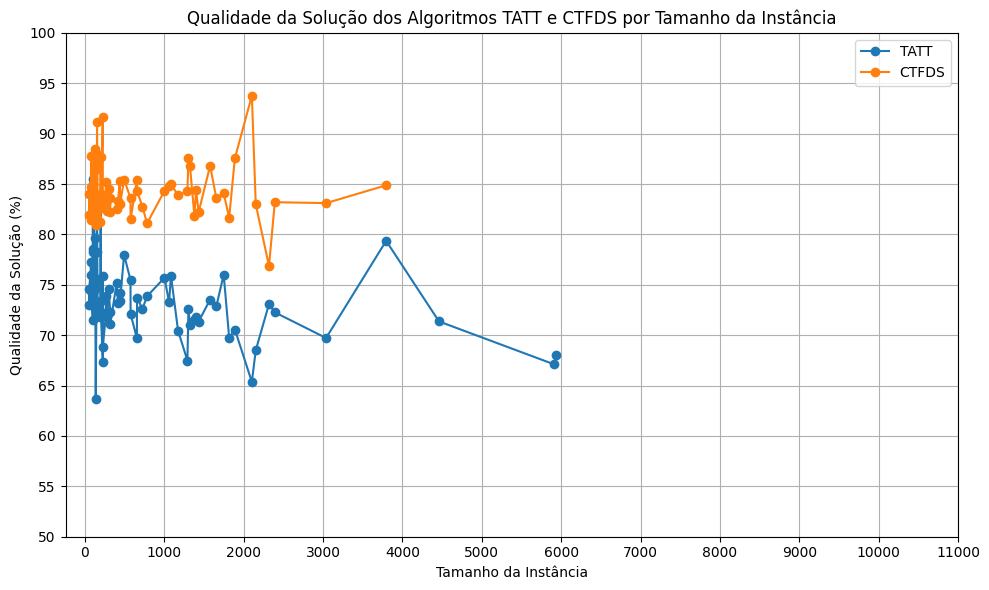

In [34]:
plt.figure(figsize=(10, 6))

# Plotar linha para TATT
plt.plot(df_tatt['Tamanho'], df_tatt['Qualidade'], label='TATT', marker='o')

# Plotar linha para CTFDS
plt.plot(df_ctfds['Tamanho'], df_ctfds['Qualidade'], label='CTFDS', marker='o')

# Configurar o gráfico
plt.xlabel('Tamanho da Instância')
plt.ylabel('Qualidade da Solução (%)')
plt.title('Qualidade da Solução dos Algoritmos TATT e CTFDS por Tamanho da Instância')
plt.xticks(range(0, df['Tamanho'].max() + 1, 1000))
plt.yticks(range(50, 101, 5)) 
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

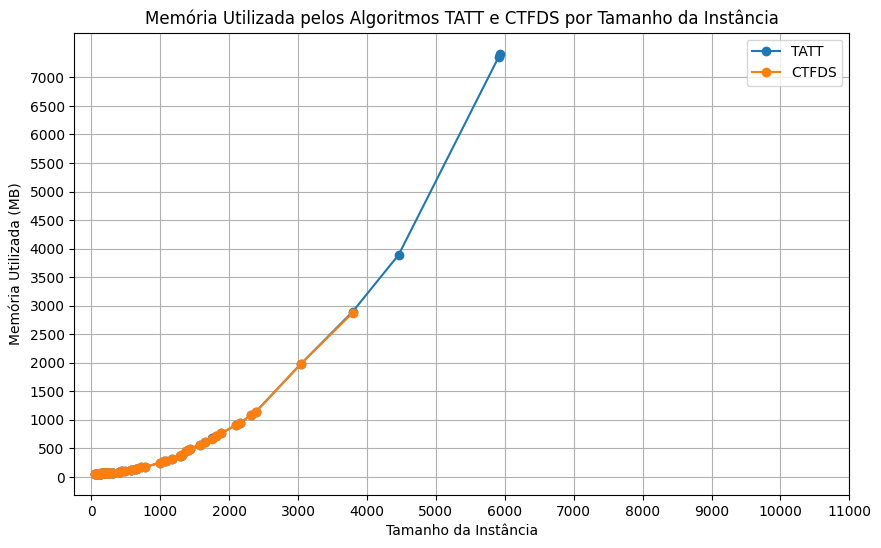

In [36]:
plt.figure(figsize=(10, 6))

# Plotar linha para TATT
plt.plot(df_tatt['Tamanho'], df_tatt['Memoria'], label='TATT', marker='o')

# Plotar linha para CTFDS
plt.plot(df_ctfds['Tamanho'], df_ctfds['Memoria'], label='CTFDS', marker='o')

# Configurar o gráfico
plt.xlabel('Tamanho da Instância')
plt.ylabel('Memória Utilizada (MB)')
plt.title('Memória Utilizada pelos Algoritmos TATT e CTFDS por Tamanho da Instância')
plt.xticks(range(0, df['Tamanho'].max() + 1, 1000))

# df['Memoria'] é float, logo max() nao funciona
plt.yticks(range(0, int(df['Memoria'].max()) + 1, 500))
plt.legend()
plt.grid(True)
plt.show()